In [9]:
import sys
sys.path.append('../')
import os
import glob
import pandas as pd
import argparse
import configparser
import numpy as np
import torch
import matplotlib
matplotlib.use('agg' )
%matplotlib inline
import matplotlib.pyplot as plt
from collections import OrderedDict

from model import *
from lib.preprocessing import *
from lib.dataloading import *
from lib.loss_functions import *
from lib.evaluation import *
from torchvision import transforms
import torchvision.models as models
from torch import optim, nn
import torch.nn.functional as F

In [2]:
from torch.utils.tensorboard import SummaryWriter

In [17]:
transform = get_transformer_norm()['val']
dataset = SSIDataset(transform= transform, inpaint = True, rand='uniform')


In [18]:
crop_img, center, label = dataset[0]

In [19]:
def tensor2numpy(img):
    img = img.detach().numpy()
    img = np.rollaxis(img, 0, 3)
    
    #min = np.min(img)
    #max = np.max(img)
    #img = (img - min)/ (max-min)
    return img

In [20]:
crop_img = tensor2numpy(crop_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


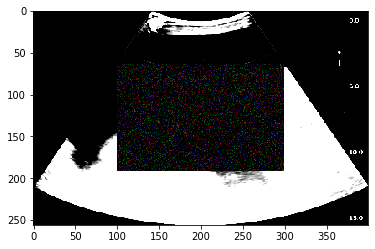

In [21]:
plt.imshow(crop_img)

In [22]:
np.min(crop_img)

-1.6159198